In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:\\Users\\Hotelsng\\Downloads\\RIghteous Law Firm-Knife Nnamdi\\RIghteous-Law-Firm\\Workers-Compensation\\workcomp.csv')

In [3]:
df.head()

,Claim Number,Adjustor Notes,Body Part,Nature of Injury,Cause of Injury,Vehicle Flag (1=Motor Vehicle Involved),Subrogation (1=Yes 0=No),Fraud Flag (1=Yes 0=No)
0,4487308,Strained neck trying to catch falling product.,Neck,Sprain/Strain,Slip/Fall,0,1,0
1,309831108,Fingers caught in machine.,Finger,Contusion,Caught in Machine,0,0,0
2,1301185908,Claimant caught left hand between two machine ...,Hand,Laceration,Equipment/Machinery,0,0,0
3,1716965808,Claimant states that while he and coworker wer...,Multiple,Contusion,Struck Object,1,1,0
4,1924817308,"Smashed right second finger, was using a drill...",Finger,Contusion,Struck Object,0,0,0


In [4]:
df['Body Part'].value_counts()

Back        706
Finger      263
Head        233
Arm         215
Hand        200
Multiple    160
Knee        151
Wrist       136
Leg         131
Foot        128
Shoulder    120
Ankle       116
Neck        111
Eye         105
Spine        41
Groin        37
Elbow        34
Torso        34
Face         26
Toes         20
Ribs         15
Jaw          13
Tooth        13
Hip          11
Unknown       8
Abdomen       7
Ear           3
Name: Body Part, dtype: int64

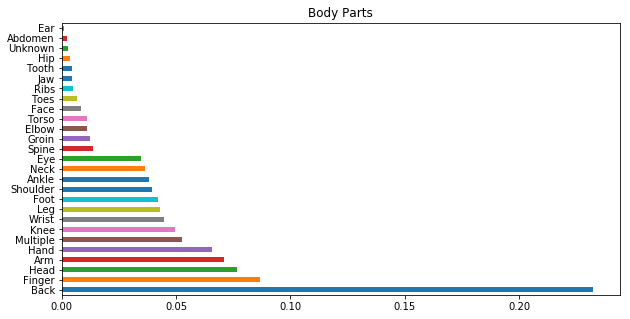

In [7]:
df['Body Part'].value_counts(normalize=True).plot.barh(figsize=(10,5), title= "Body Parts")

In [8]:
df.describe()

,Claim Number,Vehicle Flag (1=Motor Vehicle Involved),Subrogation (1=Yes 0=No),Fraud Flag (1=Yes 0=No)
count,3.037000e+03,3037.000000,3037.000000,3037.000000
mean,5.073929e+11,0.183734,0.373724,0.030622
std,2.802494e+11,0.387331,0.483871,0.172321
min,4.487308e+06,0.000000,0.000000,0.000000
25%,2.776204e+11,0.000000,0.000000,0.000000
50%,4.985097e+11,0.000000,0.000000,0.000000
75%,7.440163e+11,0.000000,1.000000,0.000000
max,9.998150e+11,1.000000,1.000000,1.000000


In [10]:
Vehicle= pd.crosstab(df["Vehicle Flag (1=Motor Vehicle Involved)"], df["Fraud Flag (1=Yes 0=No)"])

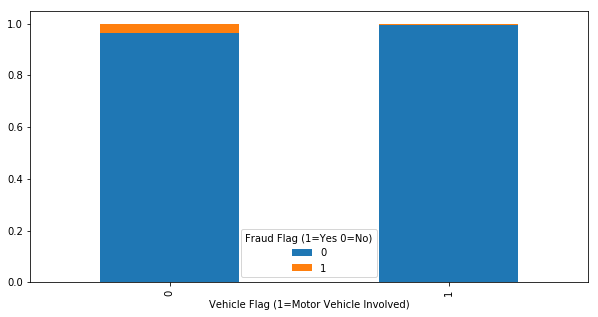

In [11]:
Vehicle.div(Vehicle.sum(1).astype(int) , axis=0).plot.bar(figsize=(10,5), stacked=True)

In [12]:
 Subrogation = pd.crosstab(df["Subrogation (1=Yes 0=No)"], df["Fraud Flag (1=Yes 0=No)"])

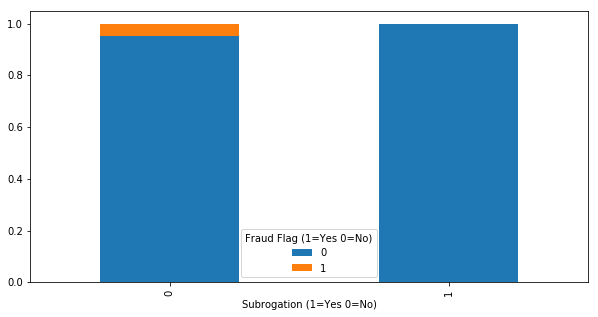

In [13]:
Subrogation.div(Subrogation.sum(1).astype(int), axis=0).plot.bar(figsize=(10,5), stacked=True)

In [14]:
df["Fraud Flag (1=Yes 0=No)"].value_counts(normalize=True)

0    0.969378
1    0.030622
Name: Fraud Flag (1=Yes 0=No), dtype: float64

In [15]:
df.isnull().sum()

Claim Number                               0
Adjustor Notes                             0
Body Part                                  0
Nature of Injury                           0
Cause of Injury                            0
Vehicle Flag (1=Motor Vehicle Involved)    0
Subrogation (1=Yes 0=No)                   0
Fraud Flag (1=Yes 0=No)                    0
dtype: int64

In [16]:
df= pd.get_dummies(df)

In [17]:
x= df.drop('Fraud Flag (1=Yes 0=No)', axis=1)

In [18]:
y= df['Fraud Flag (1=Yes 0=No)']

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)